In [13]:
import fastbook as fb
from PIL import Image
import numpy as np
import fastai.vision.all as fastai
import pandas as pd

In [2]:
path = fb.untar_data(fb.URLs.MNIST_SAMPLE)
path

Path('/home/mbp/.fastai/data/mnist_sample')

In [3]:
threes = (path/'train'/'3').ls().sorted()

In [6]:
Image.open(threes[1])


In [9]:
np.array(Image.open(threes[1]))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [19]:
df = pd.DataFrame(fastai.tensor(Image.open(threes[1])))
df.style.set_properties(**{'font-size': '2pt'}).background_gradient('Reds')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [20]:
df.shape

(28, 28)

> Warning: Stop and Think!: Before you read on, take a moment to think about how a computer might be able to recognize these two different digits. What kinds of features might it be able to look at? How might it be able to identify these features? How could it combine them together? Learning works best when you try to solve problems yourself, rather than just reading somebody else's answers; so step away from this book for a few minutes, grab a piece of paper and pen, and jot some ideas down…

- I know from my general knowledge that the solution is apparently something to do with the edges and their position in the image.
- But as a human, I simply note the overall pattern of the image.
- So either it's something positional or something path-wise.

## First try: Pixel similarity

- We'll average the threes and sevens into an overall image.
- We're combining here into a rank-3 tensor (essentially width, height, intensity).

In [22]:
len(threes)

6131

In [23]:
sevens = (path/'train'/'7').ls().sorted()

In [24]:
three_tensors = [fastai.tensor(Image.open(o)) for o in threes]
seven_tensors = [fastai.tensor(Image.open(o)) for o in sevens]

In [25]:
print(f"{len(three_tensors)} {type(three_tensors[0])} threes and {len(seven_tensors)} {type(seven_tensors[0])} sevens")

6131 <class 'torch.Tensor'> threes and 6265 <class 'torch.Tensor'> sevens


<Axes: >

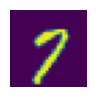

In [26]:
fastai.show_image(seven_tensors[-1])

<Axes: >

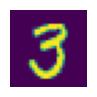

In [27]:
fastai.show_image(three_tensors[2])

In [ ]:
# convert to float then make it a value between 0 and 1 
stacked_sevens = fastai.torch.stack(seven_tensors).float()/255
stacked_threes = fastai.torch.stack(three_tensors).float()/255